### Atividades

1. Ler as bases de preços diários
2. Calcular retornos relativos diários (HP=1)
3. Calcular retorno médio e desvio padrão de cada ativo
4. Calcular matriz de covariância dos ativos
5. Plotar os ativos num gráfico de dispersão: retorno x risco
6. Definir pesos para os ativos e compor em uma carteira. Calcular o retorno e o risco desta carteira
7. Simular diversos conjuntos de pesos aleatoriamente e plotar no gráfico de dispersão estas carteiras

### Dicas

1. Defina funções para ler as bases ao invés de repetir os códigos.
2. Utilize as funções do Pandas - .mean(), .cov(), .shift(), etc.
3. Verifique os resultados a cada cálculo.
4. Para multiplicação matricial, utilize: np.dot()
5. Para simular valores aleatórios, utilize: np.ramdon.ramdon()

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.optimize as solver
from datetime import datetime

In [2]:
# Ler e tratar as bases
def read_infoMoney(file_name):
    df = pd.read_csv(file_name)
    df = df.applymap(lambda x: str(x.replace(',','.')))
    df['VOLUME'] = df['VOLUME'].map(lambda x: x.lstrip('.'))
    df = df.applymap(lambda x: str(x.replace('K', '000')))
    df = df.applymap(lambda x: str(x.replace('M', '000000')))
    df = df.applymap(lambda x: str(x.replace('B', '000000000')))
    df[['ABERTURA', 'FECHAMENTO', 'VARIAÇÃO', 'MÍNIMO', 'MÁXIMO', 'VOLUME']].applymap(lambda x: float(x))
    df = df.drop(['ABERTURA', 'VARIAÇÃO', 'MÍNIMO', 'MÁXIMO', 'VOLUME'], axis = 1)
    df['DATA'] = df['DATA'].map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
    
    #df['VOLUME'] = df['VOLUME'].applymap(lambda x: x * 1000)
       
    return df

In [3]:
df_ALPA3 = read_infoMoney('Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv')

df_ALPA3

,DATA,FECHAMENTO
0,2018-12-28,20.17
1,2018-12-27,19.66
2,2018-12-21,20.69
3,2018-12-20,20.03
4,2018-12-19,20.03
...,...,...
203,2018-01-09,20.73
204,2018-01-08,20.43
205,2018-01-05,20.38
206,2018-01-04,20.48


In [4]:
df_ALPA3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATA        208 non-null    datetime64[ns]
 1   FECHAMENTO  208 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.4+ KB


In [5]:
df_ALPA3['DATA'][0]

Timestamp('2018-12-28 00:00:00')

In [6]:
df_ALPA3 = read_infoMoney('Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv')
df_ABEV3 = read_infoMoney('Bases/Ambev SA ABEV3 - Histórico InfoMoney.csv')
df_PETR3 = read_infoMoney('Bases/Petrobras PETR3 - Histórico InfoMoney.csv')
df_CIEL3 = read_infoMoney('Bases/Cielo CIEL3 - Histórico InfoMoney.csv')
df_SEER3 = read_infoMoney('Bases/Ser Educacional SEER3 - Histórico InfoMoney.csv')
df_MGLU3 = read_infoMoney('Bases/Magazine Luiza MGLU3 - Histórico InfoMoney.csv')
df_ITUB3 = read_infoMoney('Bases/Itaú Unibanco ITUB3 - Histórico InfoMoney.csv')
df_VALE3 = read_infoMoney('Bases/Vale S.A. VALE3 - Histórico InfoMoney.csv')

In [7]:
# Dicionário de ativos
assets = {'ALPA3': 'Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv',
          'ABEV3': 'Bases/Ambev SA ABEV3 - Histórico InfoMoney.csv',
          'PETR3': 'Bases/Petrobras PETR3 - Histórico InfoMoney.csv',
          'CIEL3': 'Bases/Cielo CIEL3 - Histórico InfoMoney.csv',
          'SEER3': 'Bases/Ser Educacional SEER3 - Histórico InfoMoney.csv',
          'MGLU3': 'Bases/Magazine Luiza MGLU3 - Histórico InfoMoney.csv',
          'ITUB3': 'Bases/Itaú Unibanco ITUB3 - Histórico InfoMoney.csv',
          'VALE3': 'Bases/Vale S.A. VALE3 - Histórico InfoMoney.csv'}
assets

{'ALPA3': 'Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv',
 'ABEV3': 'Bases/Ambev SA ABEV3 - Histórico InfoMoney.csv',
 'PETR3': 'Bases/Petrobras PETR3 - Histórico InfoMoney.csv',
 'CIEL3': 'Bases/Cielo CIEL3 - Histórico InfoMoney.csv',
 'SEER3': 'Bases/Ser Educacional SEER3 - Histórico InfoMoney.csv',
 'MGLU3': 'Bases/Magazine Luiza MGLU3 - Histórico InfoMoney.csv',
 'ITUB3': 'Bases/Itaú Unibanco ITUB3 - Histórico InfoMoney.csv',
 'VALE3': 'Bases/Vale S.A. VALE3 - Histórico InfoMoney.csv'}

In [8]:
df_assets = pd.DataFrame()
df_assets = df_assets.append(assets, ignore_index=True)
print(df_assets.head())

                                            ABEV3  \
0  Bases/Ambev SA ABEV3 - Histórico InfoMoney.csv   

                                              ALPA3  \
0  Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv   

                                         CIEL3  \
0  Bases/Cielo CIEL3 - Histórico InfoMoney.csv   

                                               ITUB3  \
0  Bases/Itaú Unibanco ITUB3 - Histórico InfoMone...   

                                               MGLU3  \
0  Bases/Magazine Luiza MGLU3 - Histórico InfoMon...   

                                             PETR3  \
0  Bases/Petrobras PETR3 - Histórico InfoMoney.csv   

                                               SEER3  \
0  Bases/Ser Educacional SEER3 - Histórico InfoMo...   

                                             VALE3  
0  Bases/Vale S.A. VALE3 - Histórico InfoMoney.csv  


In [9]:
type(assets)

dict

In [10]:
# Consolidando os dados em um único DF

df_assets = pd.DataFrame(assets)
 
df_assets

ValueError: If using all scalar values, you must pass an index

In [231]:
df_ALPA3 = read_infoMoney('Bases/Alpargatas ALPA3 - Histórico InfoMoney.csv')
df_ABEV3 = read_infoMoney('Bases/Ambev SA ABEV3 - Histórico InfoMoney.csv')
df_PETR3 = read_infoMoney('Bases/Petrobras PETR3 - Histórico InfoMoney.csv')
df_CIEL3 = read_infoMoney('Bases/Cielo CIEL3 - Histórico InfoMoney.csv')
df_SEER3 = read_infoMoney('Bases/Ser Educacional SEER3 - Histórico InfoMoney.csv')
df_MGLU3 = read_infoMoney('Bases/Magazine Luiza MGLU3 - Histórico InfoMoney.csv')
df_ITUB3 = read_infoMoney('Bases/Itaú Unibanco ITUB3 - Histórico InfoMoney.csv')
df_VALE3 = read_infoMoney('Bases/Vale S.A. VALE3 - Histórico InfoMoney.csv')

In [236]:
df_assets = pd.merge([df_ALPA3, df_ABEV3,df_PETR3,df_CIEL3,df_SEER3,df_MGLU3,df_ITUB3,df_VALE3], on="DATA",
                     how='outer')
                        #keys =['ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3'])

df_assets

TypeError: merge() missing 1 required positional argument: 'right'

In [95]:
from functools import reduce

data_frames = [df_ALPA3, df_ABEV3,df_PETR3,df_CIEL3,df_SEER3,df_MGLU3,df_ITUB3,df_VALE3]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATA'],
                                            how='outer'), data_frames)

df_merged.columns = ['DATA','ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3']

In [12]:
df_merged.head()

,DATA,ALPA3,ABEV3,PETR3,CIEL3,SEER3,MGLU3,ITUB3,VALE3
0,2018-12-28,20.17,13.99,20.27,7.71,13.43,5.59,20.52,40.76
1,2018-12-27,19.66,13.73,19.51,7.55,13.22,5.38,20.14,39.56
2,2018-12-21,20.69,13.80,19.26,7.89,13.60,5.65,20.01,40.65
3,2018-12-20,20.03,13.83,19.24,7.85,13.43,5.50,20.35,39.81
4,2018-12-19,20.03,14.01,19.72,8.22,13.49,5.47,20.27,39.97


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATA    245 non-null    datetime64[ns]
 1   ALPA3   208 non-null    object        
 2   ABEV3   245 non-null    object        
 3   PETR3   245 non-null    object        
 4   CIEL3   245 non-null    object        
 5   SEER3   245 non-null    object        
 6   MGLU3   245 non-null    object        
 7   ITUB3   245 non-null    object        
 8   VALE3   245 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 19.1+ KB


In [97]:
df_merged = df_merged[['ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3']].applymap(lambda x: float(x))

In [14]:
df_merged.isna().sum()

DATA      0
ALPA3    37
ABEV3     0
PETR3     0
CIEL3     0
SEER3     0
MGLU3     0
ITUB3     0
VALE3     0
dtype: int64

In [74]:
def nan_mean(serie):
    for i in range(len(serie), 1):
        if serie[serie.isna()] == True:
            serie = serie.fillna(np.mean(serie[i:-10]))
        else:
            continue
    return serie

In [130]:
np.mean(df_merged['ALPA3'][10:-10])

17.82454545454545

In [125]:
for i in range(len(df_merged['ALPA3']), 1):
    if pd.isna(df_merged['ALPA3'][i]) == True:
        df_merged['ALPA3'][i] = df_merged['ALPA3'][i:-10].mean()
    else:
        continue

In [124]:
if pd.isna(df_merged['ALPA3'][244]) == True:
    print('p')

p


In [126]:
df_merged['ALPA3']

0      20.17
1      19.66
2      20.69
3      20.03
4      20.03
       ...  
240      NaN
241      NaN
242      NaN
243      NaN
244      NaN
Name: ALPA3, Length: 245, dtype: float64

In [100]:
df_merged['ALPA3'].mean()

17.925432692307684

In [53]:
df_merged['ALPA3'][df_merged['ALPA3'].isna() == True]

208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
225   NaN
226   NaN
227   NaN
228   NaN
229   NaN
230   NaN
231   NaN
232   NaN
233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
240   NaN
241   NaN
242   NaN
243   NaN
244   NaN
Name: ALPA3, dtype: float64

In [21]:
type(df_merged['ALPA3'][0])

str

In [23]:
type(df_merged['ALPA3'][0])

numpy.float64

In [33]:
# Calcular retornos
def calc_return(df, ativo, hp):
    df_return[ativo] = pd.DataFrame(df[ativo]/df[ativo].shift(hp) - 1)
    return df_return


In [34]:
df_merged.columns[1:]

Index(['ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3'], dtype='object')

In [94]:
calc_return(df_merged, 'ALPA3', 1)

TypeError: 'type' object does not support item assignment

In [93]:
df_return['ALPA3'] = pd.DataFrame(df_merged['ALPA3']/df_merged['ALPA3'].shift(1) - 1)

df_return

NameError: name 'df_return' is not defined

In [86]:
pd.DataFrame(df_merged['ALPA3']/df_merged['ALPA3'].shift(1) - 1)

,ALPA3
0,NaN
1,-0.025285
2,0.052391
3,-0.031899
4,0.000000
...,...
240,0.000000
241,0.000000
242,0.000000
243,0.000000


In [92]:
for i in ['ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3']:
    df_return = calc_return(df_merged, i, 1)
    df_return

TypeError: 'type' object does not support item assignment

In [134]:
df_m = df_merged.drop('ALPA3', axis=1)

df_m

,ABEV3,PETR3,CIEL3,SEER3,MGLU3,ITUB3,VALE3
0,13.99,20.27,7.71,13.43,5.59,20.52,40.76
1,13.73,19.51,7.55,13.22,5.38,20.14,39.56
2,13.80,19.26,7.89,13.60,5.65,20.01,40.65
3,13.83,19.24,7.85,13.43,5.50,20.35,39.81
4,14.01,19.72,8.22,13.49,5.47,20.27,39.97
...,...,...,...,...,...,...,...
240,21.07,19.25,15.70,15.16,2.98,20.15,34.68
241,21.03,18.81,15.76,15.65,2.92,19.90,34.83
242,20.58,18.10,16.29,15.18,2.98,19.71,33.36
243,19.30,15.37,20.64,26.50,2.39,17.40,32.92


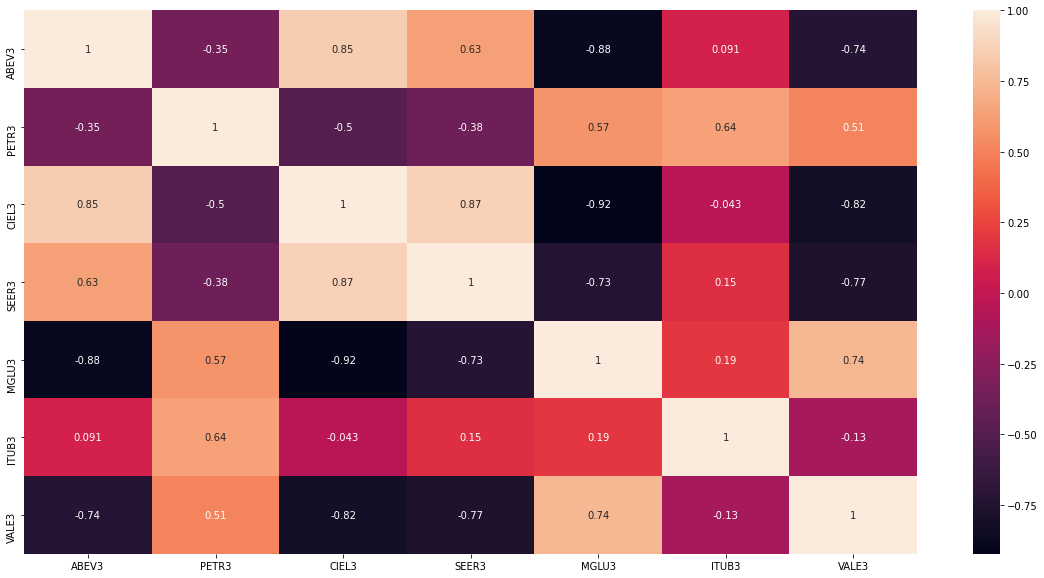

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.heatmap(df_m.corr(), annot=True)
plt.show()

In [ ]:
# Cálculo da correlação entre os ativos
correl_matrix =

cov_matrix = 

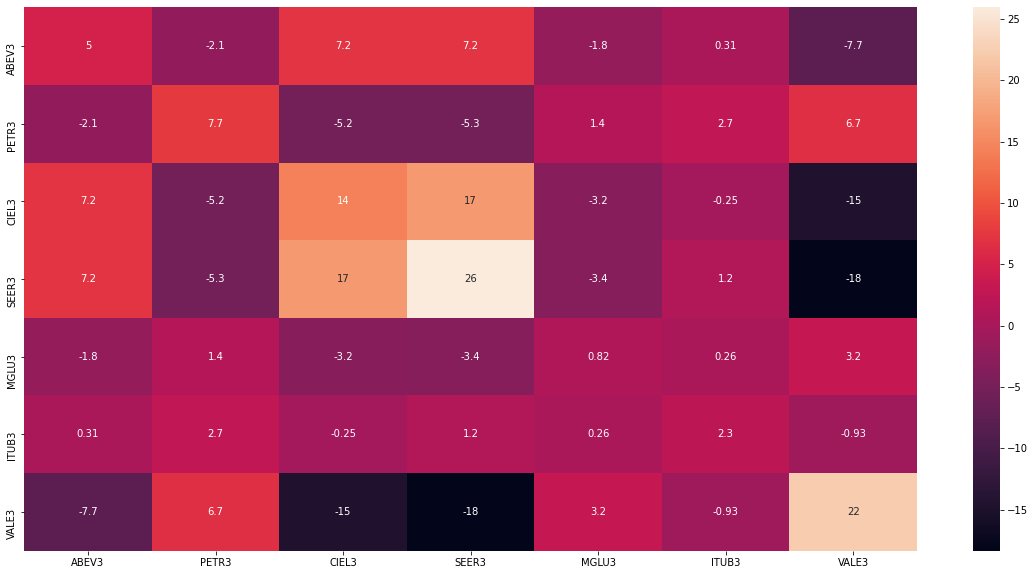

In [148]:
plt.figure(figsize = (20,10))
sns.heatmap(df_m.cov(), annot=True)
plt.show()

In [ ]:
# Cálculo do retorno e desvio padrão dos ativos
mi =  # média
sigma =  # desvio padrão



In [ ]:
# Gráfico dos ativos: retorno x risco


In [ ]:
# Compondo uma carteira 


In [ ]:
# Cálculo de retorno e risco da carteira
mi_P = 
sigma_P = 

print(f'Retorno esperado: {round(mi_P*100, 4)}%, risco: {round(sigma_P*100, 4)}%')

In [ ]:
# Simulando carteiras com pesos diferentes

    
# Gráfico
   

## Otimização de portfólio

Todo processo de otimização necessita da elaboração de uma função objetiva e da definição de um conjunto de restrições (se houver). Por exemplo, podemos minimizar uma função custo ou maximizar uma função de lucro. No nosso caso, utilizando a teoria de portfólio de Markowitz, desejamos uma das duas coisas:
- minimizar a volatilidade da carteira ou
- maximizar os retornos esperados

Analisaremos adiante cada um dos casos.

### Minimizar a volatilidade

Neste caso, desejamos obter um conjunto de pesos para os ativos da análise, tais que o risco da carteira ponderada por estes pesos seja o menor possível. Podemos escrever este objetivo da seguinte forma:

$$ min F(w) = \sqrt{\sum_{i=1}^N \sum_{j=1}^N W_i \cdot W_j \cdot COV_{i,j}} $$

Contudo, devemos considerar nossas restrições. A primeira delas refere-se aos valores dos pesos. Por definição, estes devem sempre somar 1. Portanto:

$$\sum_{i=1}^N W_i = 1 $$

ou

$$\sum_{i=1}^N W_i - 1 = 0 $$

A segunda restrição refere-se ao retorno desejado para a carteira, $\mu$. Para que este objetivo seja alcançado, podemos definir:

$$\sum_{i=1}^N W_i r_i = \mu $$

ou

$$\sum_{i=1}^N W_i r_i - \mu = 0 $$

Por fim, precisamos que os pesos possuam valores positivos e sejam menores que 100\%:

$$ w_i >= 0, \forall i=1,...,n $$
$$ w_i <= 1, \forall i=1,...,n $$

O que o cálculo numérico realiza é uma busca para encontrar o melhor conjunto de pesos para cada ativo que garanta que as restrições são respeitadas e que se tenha o menor risco possível.

---

Biblioteca Python utilizada para otimização:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

---


In [ ]:
# Definindo função objetivo
def f_obj_min_risk(w):
    return np.sqrt(np.dot(w, np.dot(cov_matrix, w)))

# Definindo valor inicial
w_ini = np.array([1/len(mi)]* len(mi)) 

In [ ]:
# Definindo o retorno desejado
ret = 0.004

# Definindo restrições
constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}, # primeira restrição
               {'type': 'eq', 'fun': lambda x: sum(x*mi) - ret}] # segunda restrição

# Definindo limites para os pesos
bounds = tuple((0, 1) for x in range(len(w))) 

In [ ]:
result = solver.minimize(f_obj_min_risk, w_ini, constraints=constraints, bounds=bounds, 
                         method='SLSQP')
result

In [ ]:
pesos = [round(w*100, 2) for w in result.x]
print(f'Pesos (%): {pesos}\nRisco portfólio (%): {round(result.fun*100,2)}')

In [ ]:
# Simulando para diversos retornos (buscando a fronteira eficiente)
ret_range = np.arange(0.0, 0.008, 0.0001)
sigma_sim = []

for ret in ret_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}, # primeira restrição
                   {'type': 'eq', 'fun': lambda x: sum(x*mi) - ret}] # segunda restrição
    
    result = solver.minimize(f_obj_min_risk, w_ini, constraints=constraints, bounds=bounds, 
                         method='SLSQP')
    sigma_sim.append(result.fun)
    
plt.plot(sigma_sim, ret_range, '--')

### Maximizar o retorno
Neste caso, fixamos a volatilidade desejada $\sigma_P$ e definimos a função objetivo para ampliar os retornos calculados a partir dos pesos. O problema de otimização pode ser rezumido por:

$$ max F(w) = \sum_{i=1}^N W_i r_i $$

Sujeito a:

$$\sqrt{\sum_{i=1}^N \sum_{j=1}^N W_i \cdot W_j \cdot COV_{i,j}} = \sigma_P $$
$$\sum_{i=1}^N W_i - 1 = 0 $$
$$ w_i >= 0, \forall i=1,...,n $$
$$ w_i <= 1, \forall i=1,...,n $$

Nas bibliotecas existentes, os problemas de otimização sempre são descritas como minimização. Mas isto não é um problema, pois podemos simplesmente inverter o sinal da função objetivo:

$$ min F(w) = - \sum_{i=1}^N W_i r_i $$

In [ ]:
# Definindo função objetivo

# Definindo valor inicial

# Definindo o retorno desejado

# Definindo restrições

# Definindo limites para os pesos


In [ ]:
# Imprime resultado


In [ ]:
# Simulando para diversos riscos (buscando a fronteira eficiente)


In [ ]:
# Gráfico 


________________________

In [ ]:
# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
                                            how='outer'), data_frames).fillna('void')

In [165]:
d1 = {k: read_infoMoney(v) for k, v in assets.items()}

d1

{'ALPA3':            DATA FECHAMENTO
 0    28/12/2018      20.17
 1    27/12/2018      19.66
 2    21/12/2018      20.69
 3    20/12/2018      20.03
 4    19/12/2018      20.03
 ..          ...        ...
 203  09/01/2018      20.73
 204  08/01/2018      20.43
 205  05/01/2018      20.38
 206  04/01/2018      20.48
 207  03/01/2018      20.42
 
 [208 rows x 2 columns],
 'ABEV3':            DATA FECHAMENTO
 0    28/12/2018      13.99
 1    27/12/2018      13.73
 2    26/12/2018      13.77
 3    21/12/2018      13.80
 4    20/12/2018      13.83
 ..          ...        ...
 240  08/01/2018      19.08
 241  05/01/2018      19.11
 242  04/01/2018      19.04
 243  03/01/2018      19.15
 244  02/01/2018      19.10
 
 [245 rows x 2 columns],
 'PETR3':            DATA FECHAMENTO
 0    28/12/2018      20.27
 1    27/12/2018      19.51
 2    26/12/2018      19.62
 3    21/12/2018      19.26
 4    20/12/2018      19.24
 ..          ...        ...
 240  08/01/2018      14.32
 241  05/01/2018      1

In [188]:
pd_asset = pd.DataFrame(d1).stack().reset_index()
pd_asset.columns = ['ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3']

ValueError: If using all scalar values, you must pass an index

In [177]:
d1.keys()

dict_keys(['ALPA3', 'ABEV3', 'PETR3', 'CIEL3', 'SEER3', 'MGLU3', 'ITUB3', 'VALE3'])